# Proyek Analisis Data: Bike Sharing
- Nama: Aditya Candra Gumilang
- Email: adityairasandi@gmail.com
- Id Dicoding: adityacandragumilang

## Menentukan Pertanyaan Bisnis

1. Cuaca seperti apa yang disukai oleh pengguna sepeda?
2. bagaimana perbandingan tren penggunaan sepeda tiap tahun?
3. musim apa yang lebih banyak pengguna sepeda?

## Menyaipkan semua library yang dibutuhkan

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates

## Data Wrangling

### Gathering data

In [128]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing data

In [129]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [130]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [131]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


In [132]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [133]:
replace_dict = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].replace(replace_dict)

In [134]:
replace_dict = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain'
}

day_df['weathersit'] = day_df['weathersit'].replace(replace_dict)

In [135]:
replace_dict = {
    0: 2011,
    1: 2012
}

day_df['yr'] = day_df['yr'].replace(replace_dict)

## Exploratory Data Analysis (EDA)


In [136]:
day_df.groupby(by='yr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                  
             mean         mean   max  min         mean
yr                                                    
2011   677.402740  2728.358904  6043  431  3405.761644
2012  1018.483607  4581.450820  8714   22  5599.934426

In [137]:
day_df.groupby(by='weathersit').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                  
                  mean         mean   max  min         mean
weathersit                                                 
Clear       964.030238  3912.755940  8714  431  4876.786177
Cloudy      687.352227  3348.510121  8362  605  4035.862348
Rain        185.476190  1617.809524  4639   22  1803.285714

In [138]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

## Visualization & Explanatory Analysis

### Pertanyaan 1: Cuaca seperti apa yang disukai oleh pengguna sepeda?

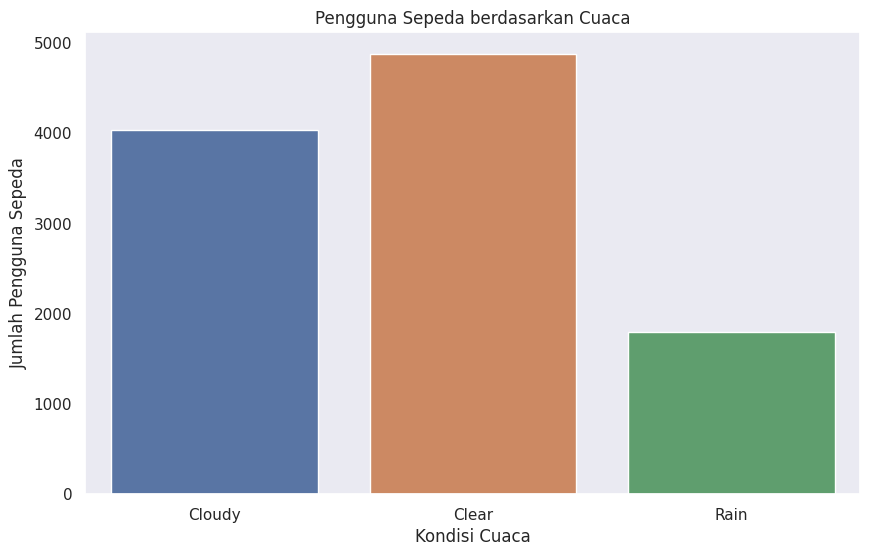

In [139]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    errorbar=None)

plt.title('Pengguna Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


### Pertanyaan 2: bagaimana perbandingan tren penggunaan sepeda tiap tahun?

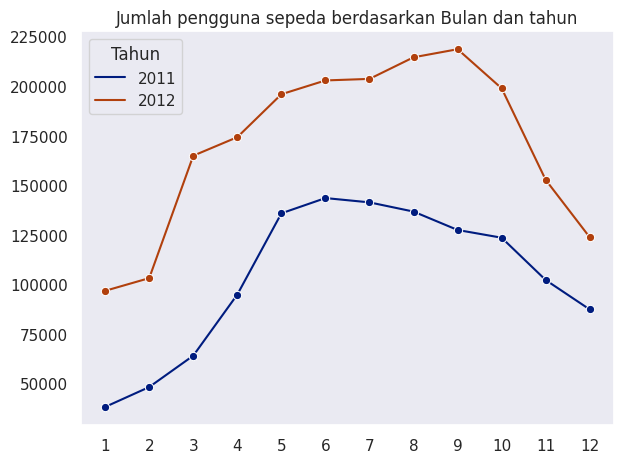

In [140]:
# day_df['month'] = pd.Categorical(day_df['month'], categories=
#     ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
#     ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="dark",
    marker="o")

plt.title("Jumlah pengguna sepeda berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


### Pertanyaan 3: musim apa yang lebih banyak pengguna sepeda?

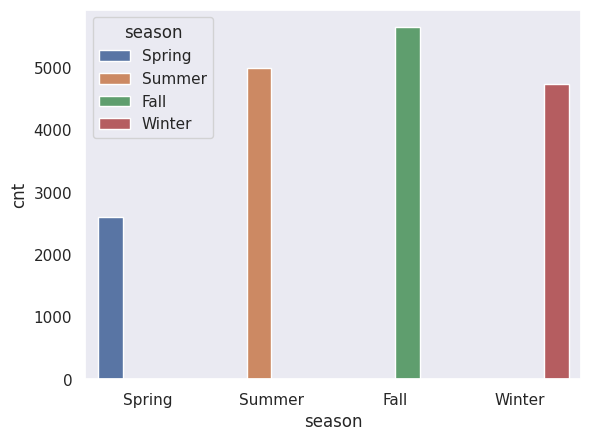

In [141]:
sns.barplot(data=day_df, x="season", y="cnt", hue="season", errorbar=None)
plt.show()

## Conclusion

- Conclution pertanyaan 1

    Pada visualisasi bar plot tersebut dapat disimpulkan bahwa pengguna sepeda lebih menyukai cuaca cerah atau "Clear" diikuti oleh "Cloudly" dan "Rain" di peringkat 2 dan 3.

- Conclution pertanyaan 2

    Pada visualiasi tersebut dapat disimpulkan bahwa tren tiap tahun relatif sama yaitu meningkat tiap pertengahan tahun dan kembali menurun di akhir tahun. Akan tetapi, untuk tahun 2012 jumlah penggunaan sepeda lebih tinggi tiap bulannya dibandingkan dengan tahun 2011

- Conclution pertanyaan 2

    Dari bar plot tersebut dapat disimpulkan bahwa penggunaan sepeda tertinggi yaitu pada musin "Fall" sedangkan penggunaan sepeda yang paling sedikit yaitu pada musim "Spring".

# Analisis Lanjutan

## RFM

In [142]:
current_date = day_df['dteday'].max()
day_df['Recency'] = (pd.to_datetime(current_date) - pd.to_datetime(day_df['dteday'])).dt.days

day_df['Frequency'] = day_df['instant']

day_df['Monetary'] = day_df['cnt']

print(day_df[['dteday', 'Recency', 'Frequency', 'Monetary']])


         dteday  Recency  Frequency  Monetary
0    2011-01-01      730          1       985
1    2011-01-02      729          2       801
2    2011-01-03      728          3      1349
3    2011-01-04      727          4      1562
4    2011-01-05      726          5      1600
..          ...      ...        ...       ...
726  2012-12-27        4        727      2114
727  2012-12-28        3        728      3095
728  2012-12-29        2        729      1341
729  2012-12-30        1        730      1796
730  2012-12-31        0        731      2729

[731 rows x 4 columns]


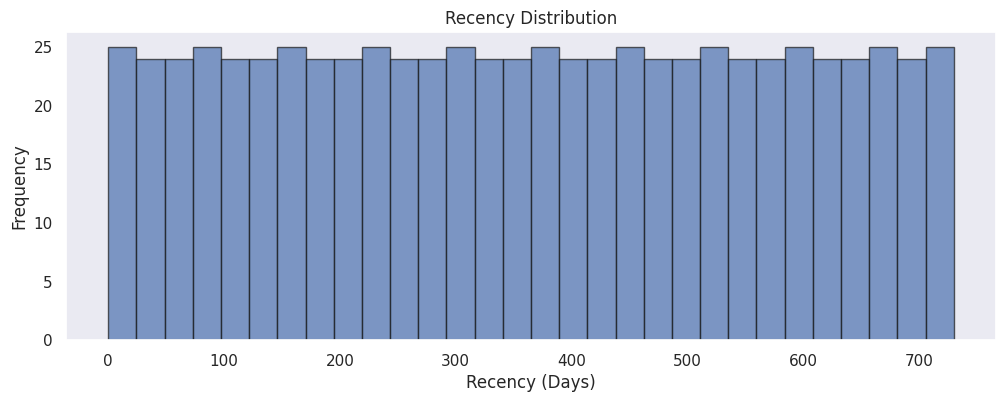

In [143]:
plt.figure(figsize=(12, 4))
plt.hist(day_df['Recency'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

Recency (R): Mengevaluasi seberapa baru pelanggan terakhir kali melakukan aktivitas, seperti peminjaman sepeda. Semakin baru, semakin baik, karena pelanggan yang lebih baru mungkin lebih cenderung melakukan transaksi lagi.

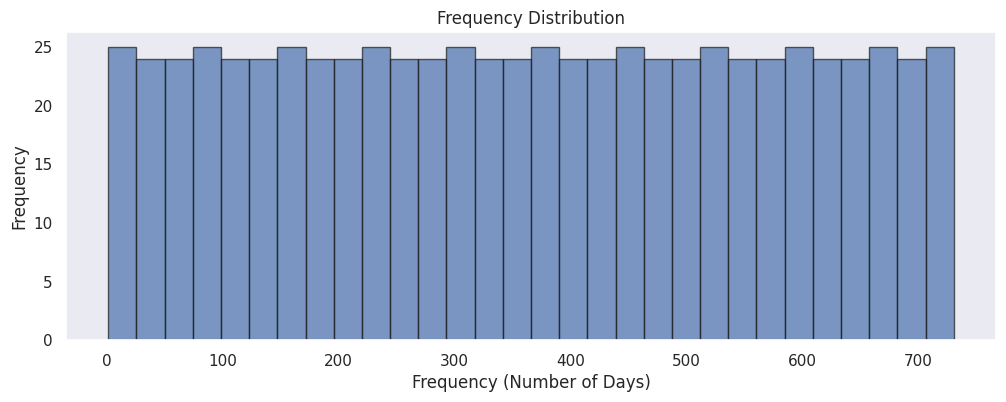

In [144]:
plt.figure(figsize=(12, 4))
plt.hist(day_df['Frequency'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Frequency Distribution')
plt.xlabel('Frequency (Number of Days)')
plt.ylabel('Frequency')
plt.show()

Frequency (F): Mengukur seberapa sering pelanggan melakukan aktivitas tertentu, seperti peminjaman sepeda. Pelanggan yang sering melakukan aktivitas ini cenderung lebih berharga karena mereka dapat berkontribusi lebih banyak pendapatan.

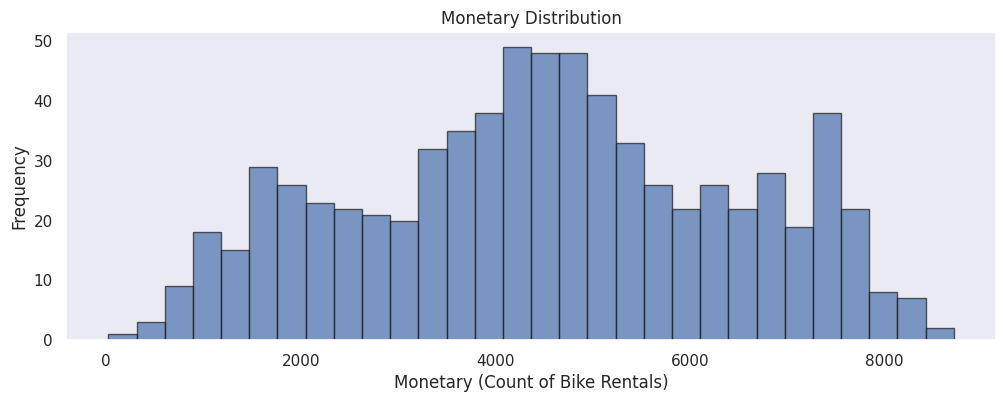

In [145]:
plt.figure(figsize=(12, 4))
plt.hist(day_df['Monetary'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (Count of Bike Rentals)')
plt.ylabel('Frequency')
plt.show()

Monetary (M): Menilai seberapa banyak uang yang dihabiskan oleh pelanggan dalam aktivitas tertentu. Pelanggan yang menghabiskan lebih banyak uang cenderung lebih berharga bagi bisnis.

## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

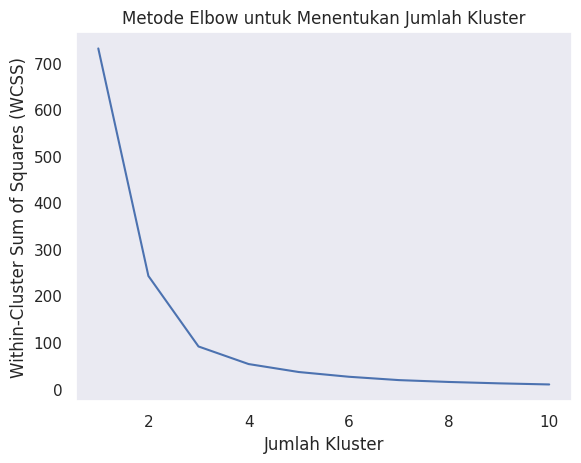

In [146]:
original_order = list(day_df.index)

X = day_df[['cnt']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

berdasarkan grafik diatas penurunan laju menjadi tidak signifikan setelah 3 kluster maka kita akan membagi data ke dalam 3 kluster

In [147]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

day_df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


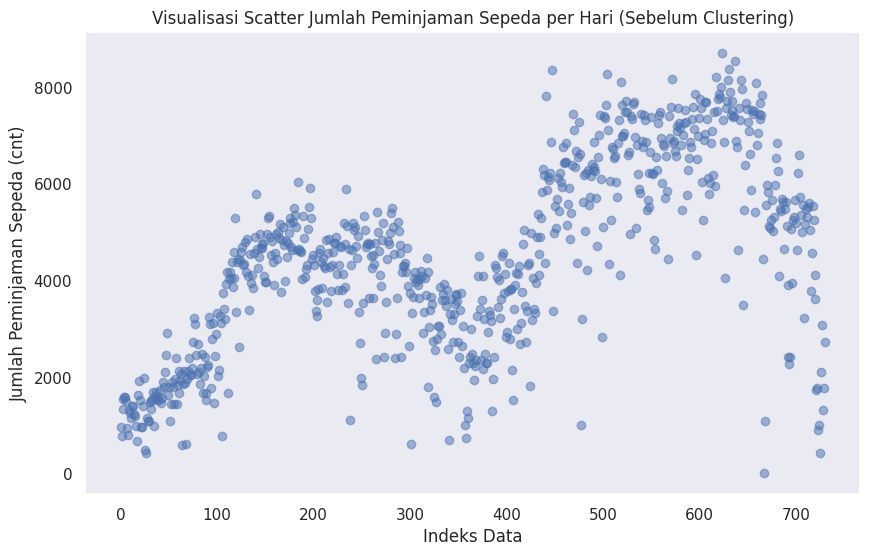

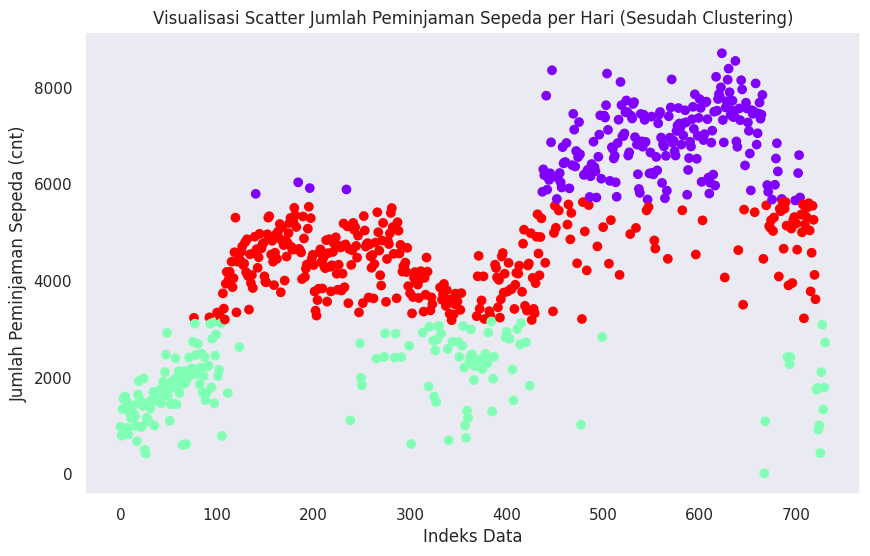

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(day_df.index, day_df['cnt'], c='b', alpha=0.5)
plt.title('Visualisasi Scatter Jumlah Peminjaman Sepeda per Hari (Sebelum Clustering)')
plt.xlabel('Indeks Data')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(original_order, day_df['cnt'], c=day_df['Cluster'], cmap='rainbow')
plt.title('Visualisasi Scatter Jumlah Peminjaman Sepeda per Hari (Sesudah Clustering)')
plt.xlabel('Indeks Data')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

Visualisasi sebelum clustering menunjukkan sebaran data pelanggan sebelum pengelompokkan dilakukan. Ini membantu kita melihat variasi dalam perilaku pelanggan sebelum kelompok-kelompok itu sendiri diidentifikasi.

Visualisasi setelah clustering menggunakan warna yang berbeda untuk menggambarkan kelompok-kelompok yang telah diidentifikasi oleh algoritme K-Means. Ini membantu kita memahami bagaimana data pelanggan telah dikelompokkan berdasarkan perilaku mereka. Dengan cara ini, kita dapat memahami lebih baik kelompok pelanggan mana yang paling berharga, yang mungkin memerlukan promosi lebih lanjut, atau yang perlu diperhatikan secara khusus.

In [149]:
day_df.to_csv("all_data.csv", index=False)